# DCGAN on CelebA

In [1]:
import numpy as np
import time
from tensorflow.examples.tutorials.mnist import input_data

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop

import matplotlib.pyplot as plt
import pandas as pd
import h5py
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


## Define Constants

In [2]:
img_rows = 32
img_cols = 32
img_channels = 1
batch_size = 41
epochs = 2

## Discriminator Architecture

In [3]:
D = Sequential()
input_shape = (32,32,1)
D.add(Conv2D(64, 5, strides=2, input_shape=input_shape, padding='same'))
D.add(BatchNormalization())
D.add(LeakyReLU(alpha=0.2))
D.add(Conv2D(128, 5, strides=2, padding='same'))
D.add(BatchNormalization())
D.add(LeakyReLU(alpha=0.2))
D.add(Conv2D(256, 5, strides=2, padding='same'))
D.add(BatchNormalization())
D.add(LeakyReLU(alpha=0.2))
D.add(Flatten())
D.add(Dense(1))
D.add(Activation('sigmoid'))
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         819456    
__________

## Generator Architecture

In [4]:
G = Sequential()
G.add(Dense(4*4*512, input_dim=(100)))
G.add(Reshape((4,4,512)))
G.add(BatchNormalization())
G.add(LeakyReLU(alpha=0.2))
G.add(Conv2DTranspose(256, 5, strides=2, padding='same'))
G.add(BatchNormalization())
G.add(LeakyReLU(alpha=0.2))
G.add(Conv2DTranspose(128, 5, strides=2, padding='same'))
G.add(BatchNormalization())
G.add(LeakyReLU(alpha=0.2))
G.add(Conv2DTranspose(1, 5, strides=2, padding='same'))
G.add(BatchNormalization())
G.add(Activation('sigmoid'))
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

## Discriminator Model

In [5]:
D_opt = Adam(lr=0.001,beta_1=0.5)
D.compile(loss='binary_crossentropy', optimizer=D_opt)

## Adversarial Model

In [6]:
G_opt = Adam(lr=0.0001,beta_1=0.5)
AM = Sequential()
AM.add(G)
AM.add(D)
AM.compile(loss='binary_crossentropy', optimizer=G_opt)

## Load Data

In [7]:
def get_batches(batch_size):
    for i in range(1,11):
        X_train = pd.read_csv("../Data/celeba_grayscale_32/train_{:02}.csv".format(i)).values.reshape(-1,32,32,1).astype("float32")/255
        for j in range(len(X_train)//batch_size):
            yield X_train[(j*batch_size):((j+1)*batch_size)]

## Function to check output

In [8]:
def check_output(noise_input):
    y_pred = G.predict(noise_input)
    plt.figure(figsize=(18,16))
    for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(y_pred[i].reshape(32,32),cmap='gray')
    plt.show()

## Train DCGAN

C:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1	Step 100	Discriminator Loss: 0.9402126842137386	Total Loss: 0.10548647786967265


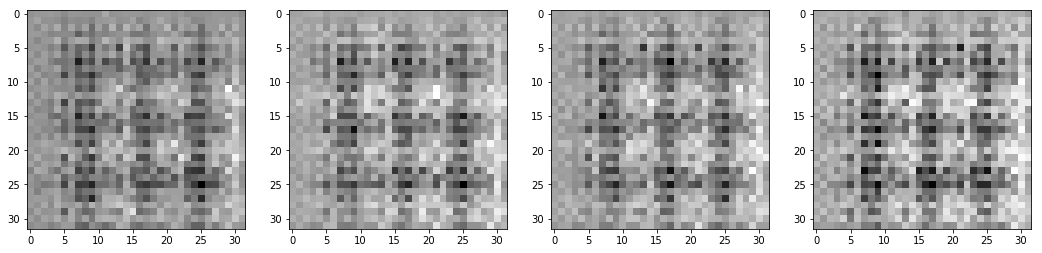

Epoch 1	Step 200	Discriminator Loss: 0.17060504586421302	Total Loss: 0.0005602349877881352


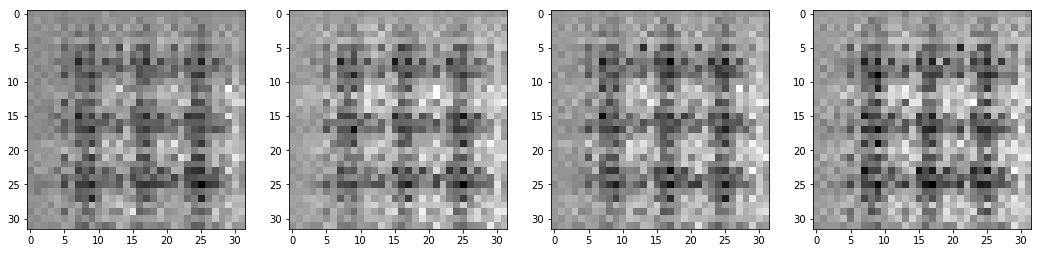

Epoch 1	Step 300	Discriminator Loss: 0.17385954194291117	Total Loss: 0.0010077640395320486


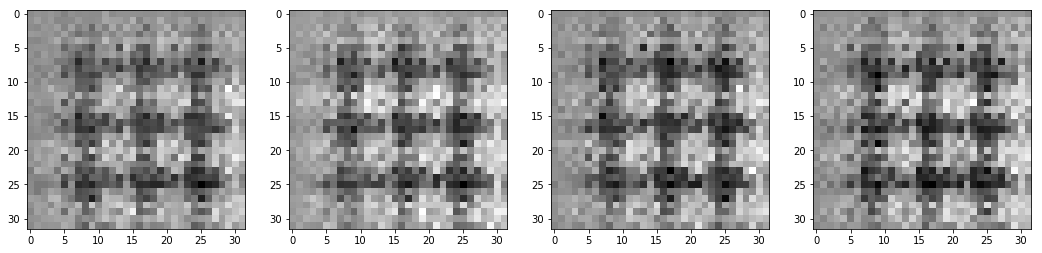

Epoch 1	Step 400	Discriminator Loss: 0.26226980186337184	Total Loss: 0.5909809232779663


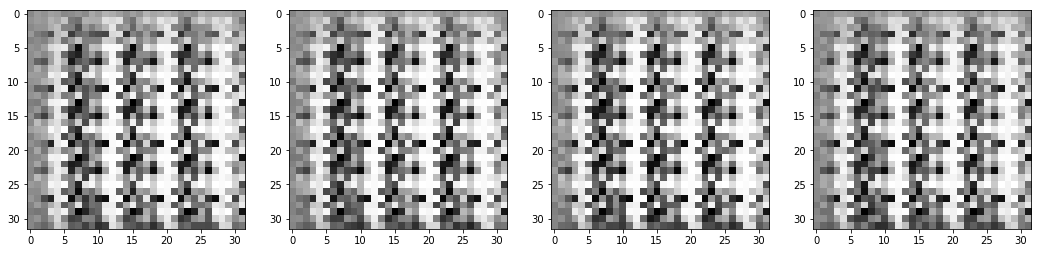

Epoch 1	Step 500	Discriminator Loss: 0.4533873317237951	Total Loss: 2.44382038384676


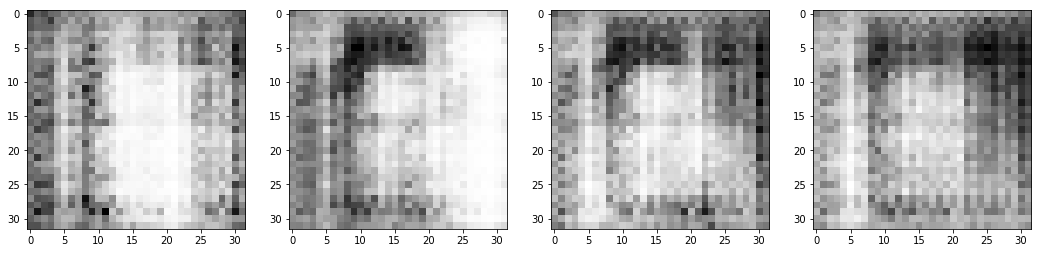

Epoch 1	Step 600	Discriminator Loss: 0.29287109933822647	Total Loss: 1.532869779318571


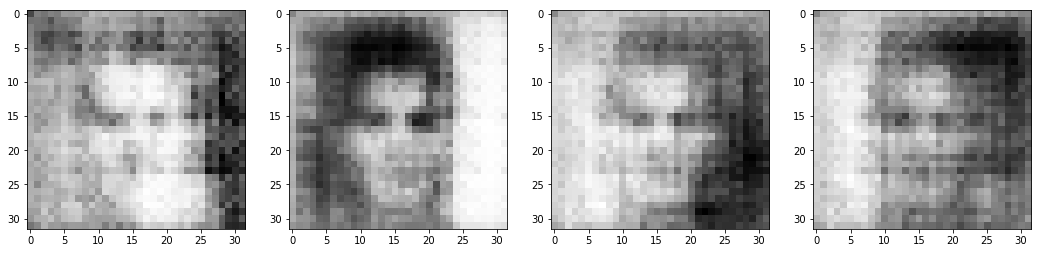

Epoch 1	Step 700	Discriminator Loss: 0.26781400000269057	Total Loss: 2.41724605768919


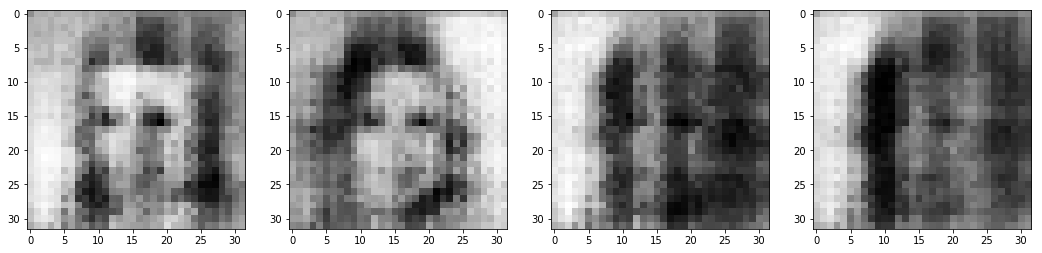

Epoch 1	Step 800	Discriminator Loss: 0.38486307858250257	Total Loss: 3.0067092527449133


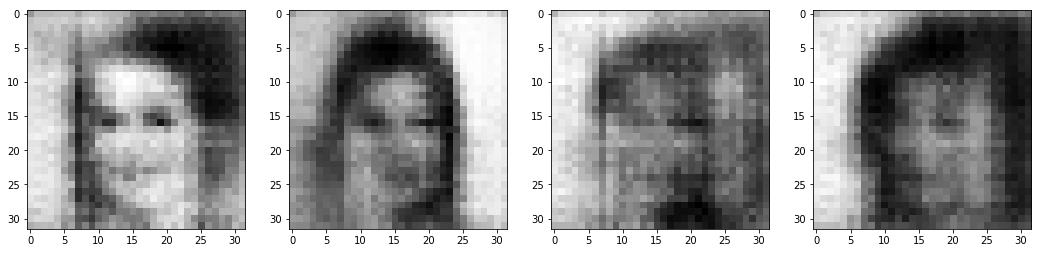

Epoch 1	Step 900	Discriminator Loss: 0.2835978219518438	Total Loss: 2.697684528827667


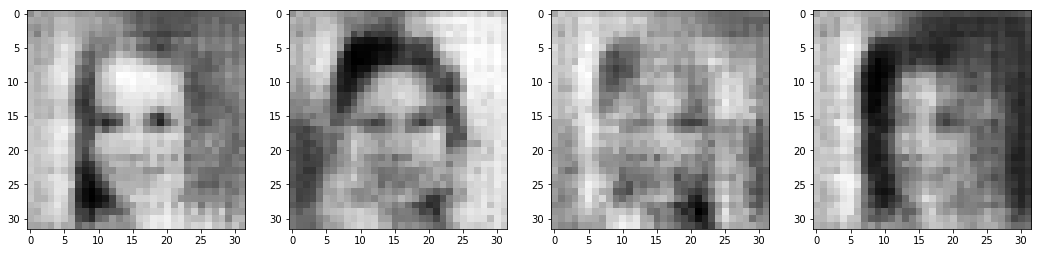

Epoch 1	Step 1000	Discriminator Loss: 0.38850097034708597	Total Loss: 3.6831063508987425


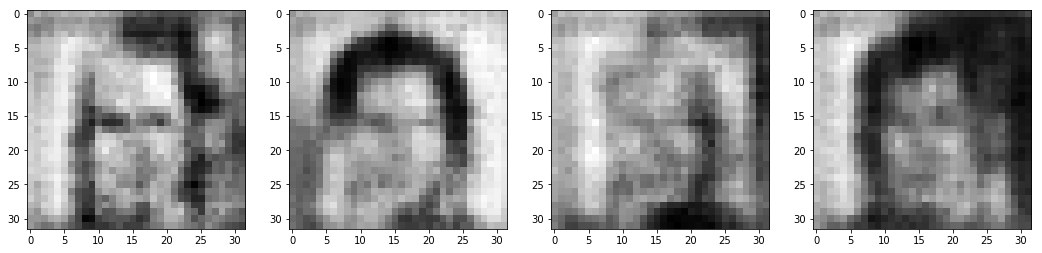

Epoch 1	Step 1100	Discriminator Loss: 0.23611310128617333	Total Loss: 2.3219058768451215


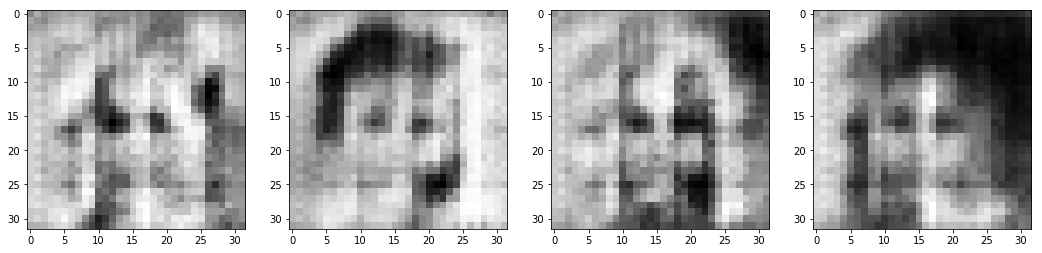

Epoch 1	Step 1200	Discriminator Loss: 0.34996055680530846	Total Loss: 3.204140536785126


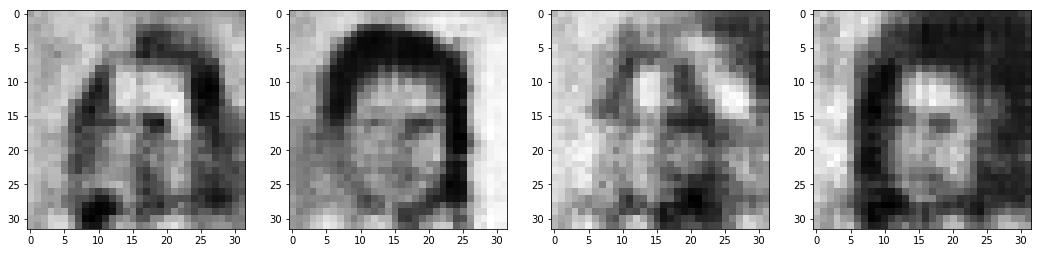

Epoch 1	Step 1300	Discriminator Loss: 0.37593035156984117	Total Loss: 3.59935092151165


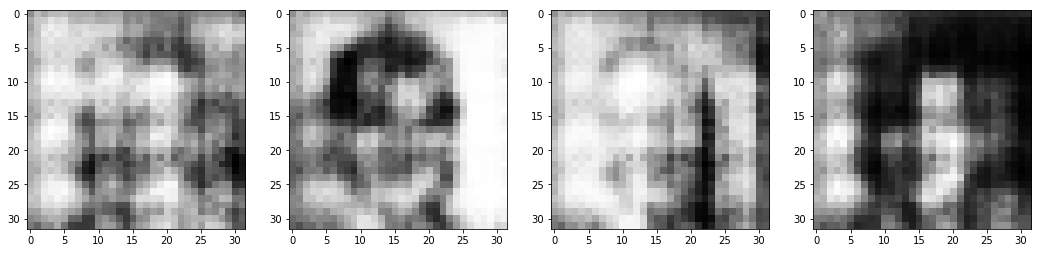

Epoch 1	Step 1400	Discriminator Loss: 0.5488554452965037	Total Loss: 3.8787436199188234


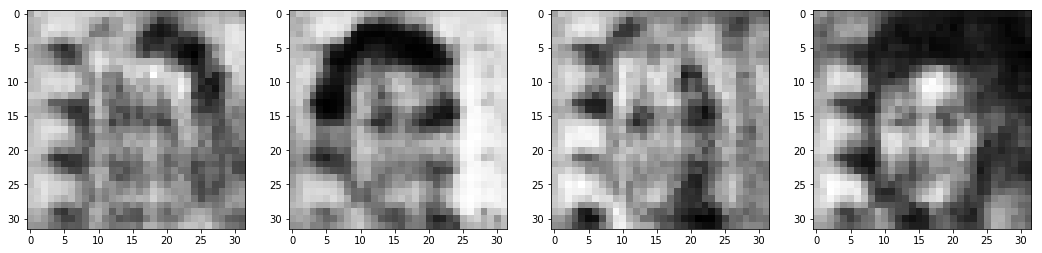

Epoch 1	Step 1500	Discriminator Loss: 0.3005790528020589	Total Loss: 2.652755997776985


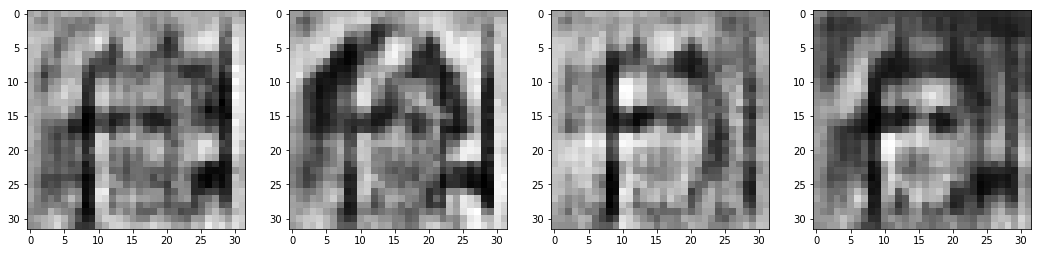

Epoch 1	Step 1600	Discriminator Loss: 0.3948734700802015	Total Loss: 3.364265513718128


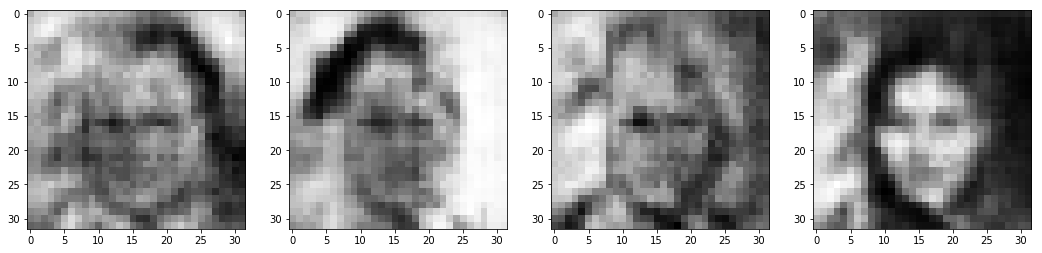

Epoch 1	Step 1700	Discriminator Loss: 0.25326265942247117	Total Loss: 1.7893134582787753


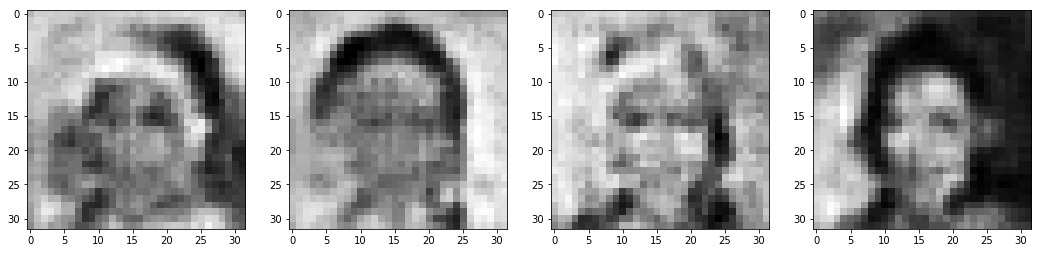

Epoch 1	Step 1800	Discriminator Loss: 0.1934074078689446	Total Loss: 0.6235686198249459


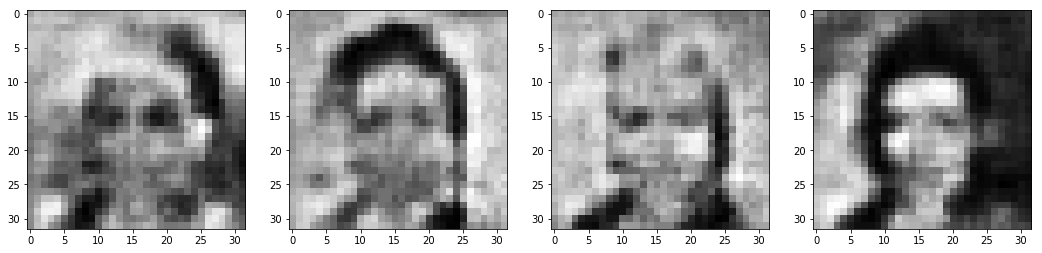

Epoch 1	Step 1900	Discriminator Loss: 0.5298559956716781	Total Loss: 3.7408338624238966


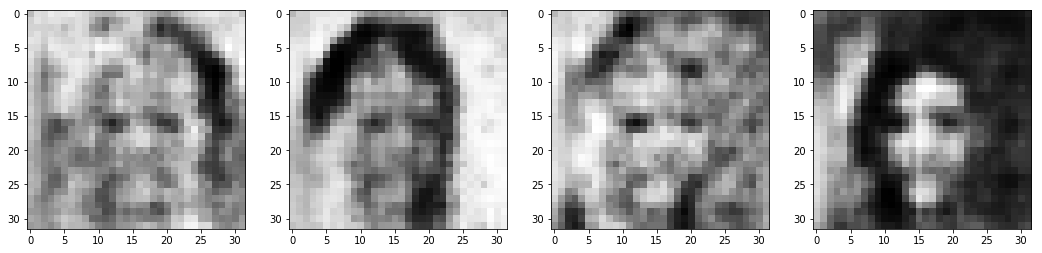

Epoch 1	Step 2000	Discriminator Loss: 0.47012406422465575	Total Loss: 2.8919032876193524


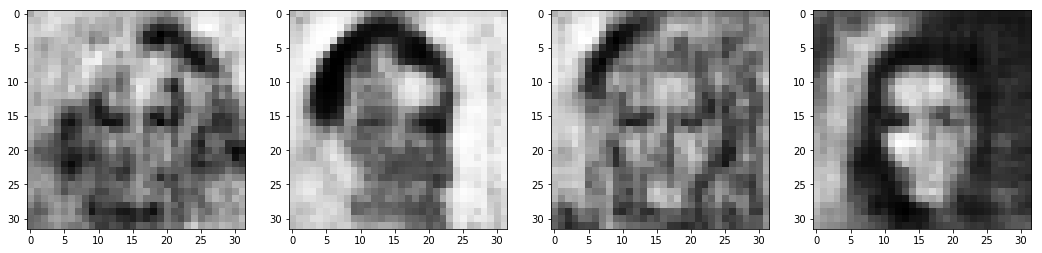

Epoch 1	Step 2100	Discriminator Loss: 0.2690966003022913	Total Loss: 1.7939411863684653


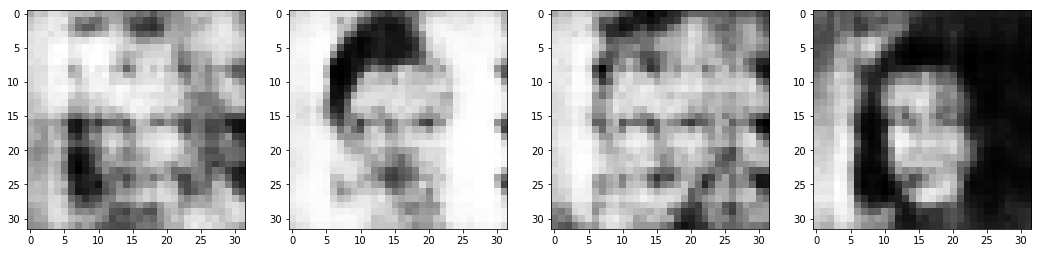

Epoch 1	Step 2200	Discriminator Loss: 0.6678409541398287	Total Loss: 2.952734661102295


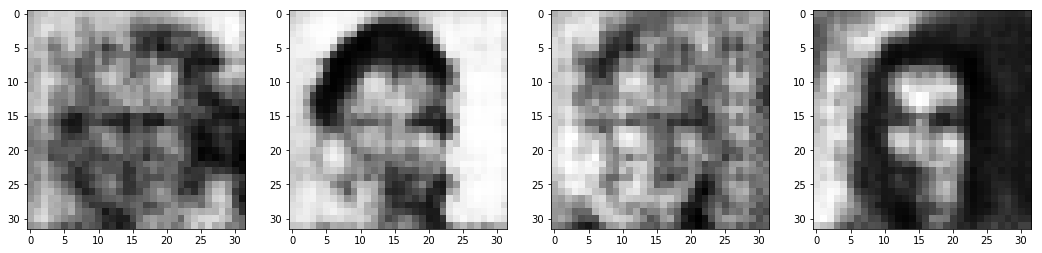

Epoch 1	Step 2300	Discriminator Loss: 0.4505466799158603	Total Loss: 2.3697494089603426


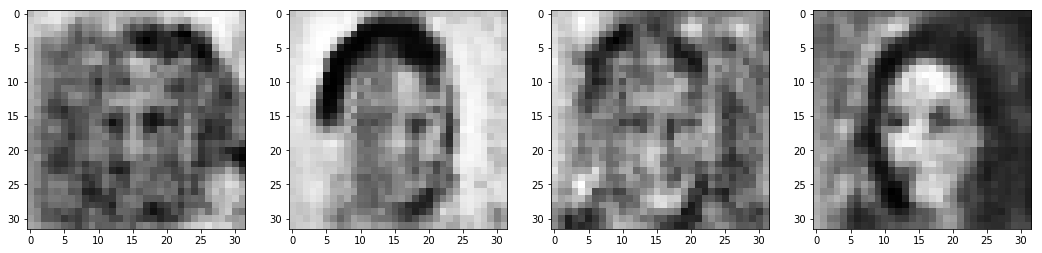

Epoch 1	Step 2400	Discriminator Loss: 0.23963567042927025	Total Loss: 0.9405215634405613


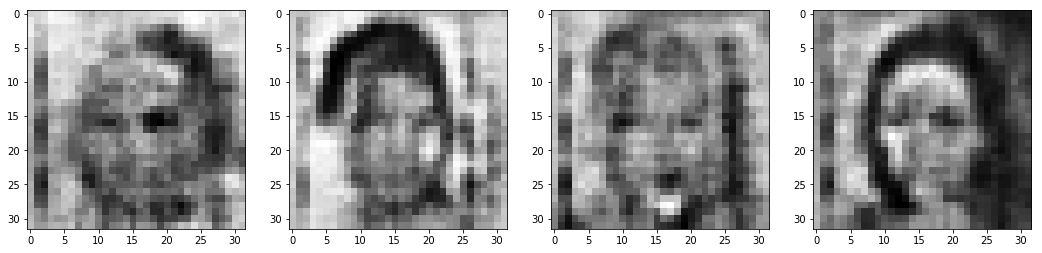

Epoch 1	Step 2500	Discriminator Loss: 0.41248596800753146	Total Loss: 1.9558331176638604


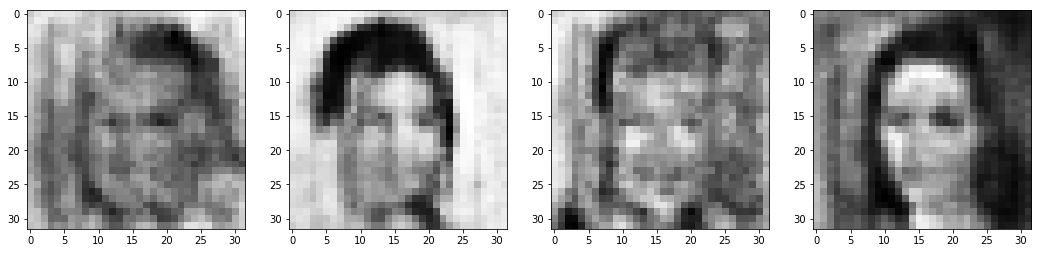

Epoch 1	Step 2600	Discriminator Loss: 0.31179994403559247	Total Loss: 1.541007365770638


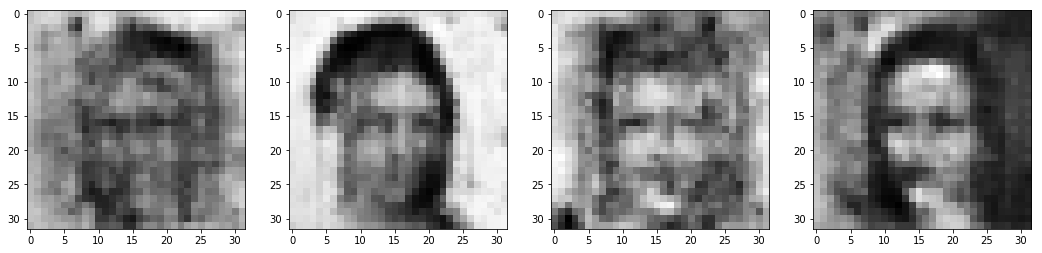

Epoch 1	Step 2700	Discriminator Loss: 0.40168733143131247	Total Loss: 2.2215436762571334


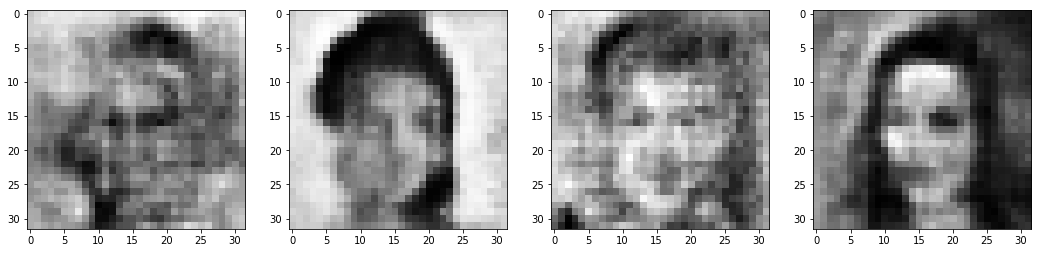

Epoch 1	Step 2800	Discriminator Loss: 0.45535443479060633	Total Loss: 1.5166559782624245


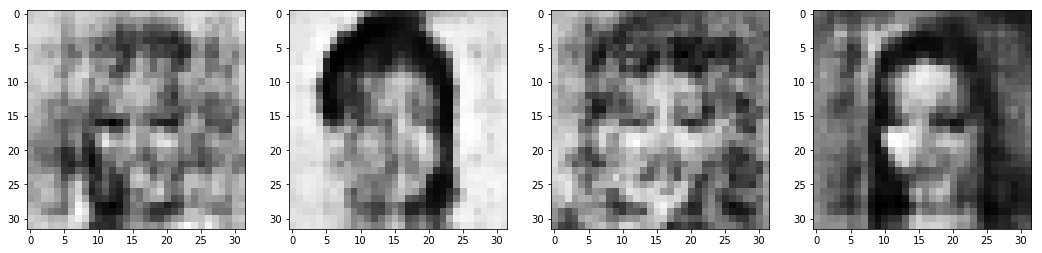

Epoch 1	Step 2900	Discriminator Loss: 0.48310160225024446	Total Loss: 1.694503249526024


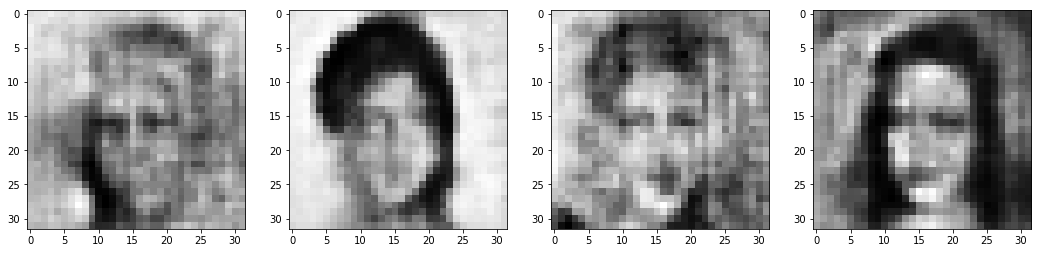

Epoch 1	Step 3000	Discriminator Loss: 0.5294550803792663	Total Loss: 1.9716110163927079


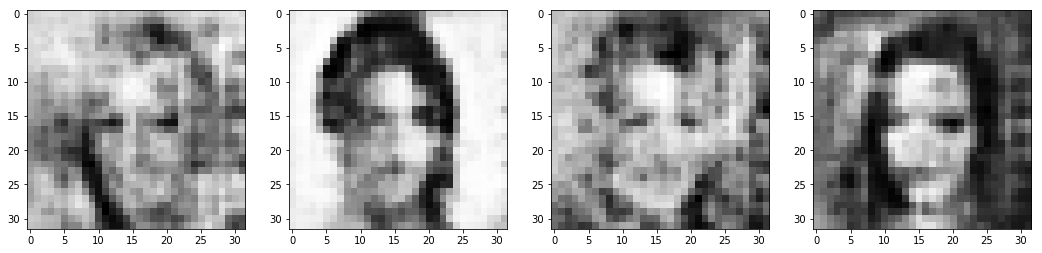

Epoch 1	Step 3100	Discriminator Loss: 0.6592714806925506	Total Loss: 1.940833489894867


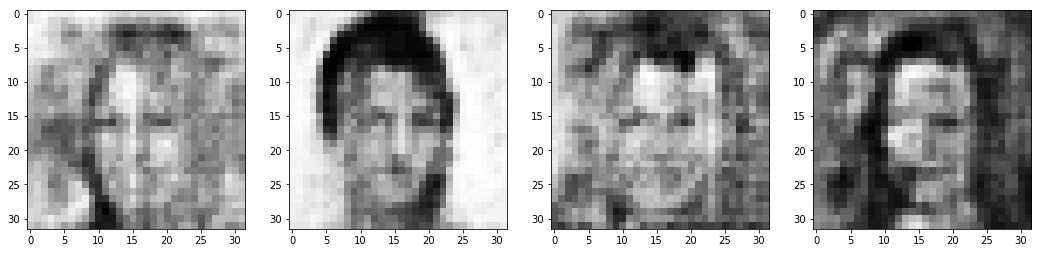

Epoch 1	Step 3200	Discriminator Loss: 0.6531081508472562	Total Loss: 1.9568421053886413


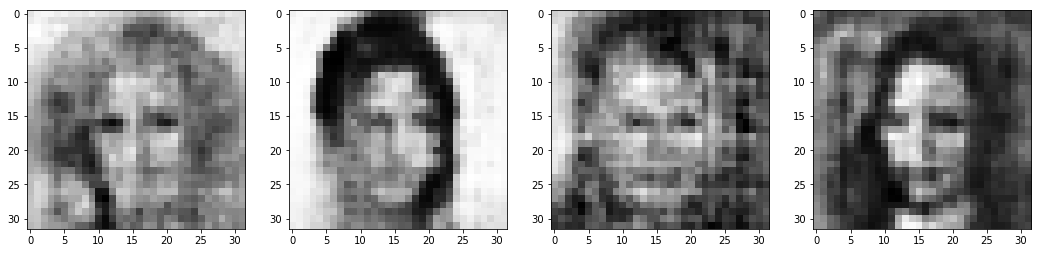

Epoch 1	Step 3300	Discriminator Loss: 0.592103119622916	Total Loss: 2.102814952135086


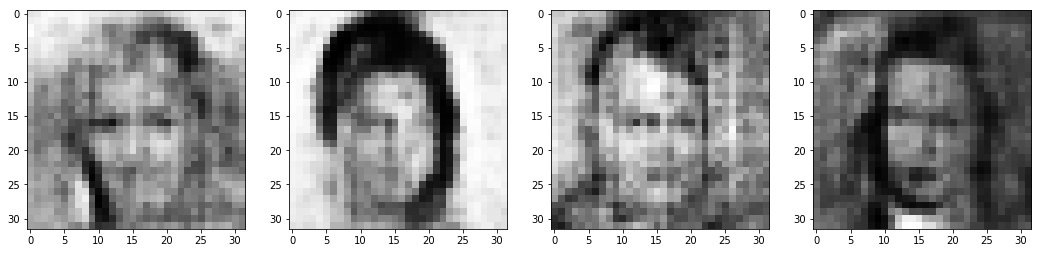

Epoch 1	Step 3400	Discriminator Loss: 0.5012020339578157	Total Loss: 1.776029269695282


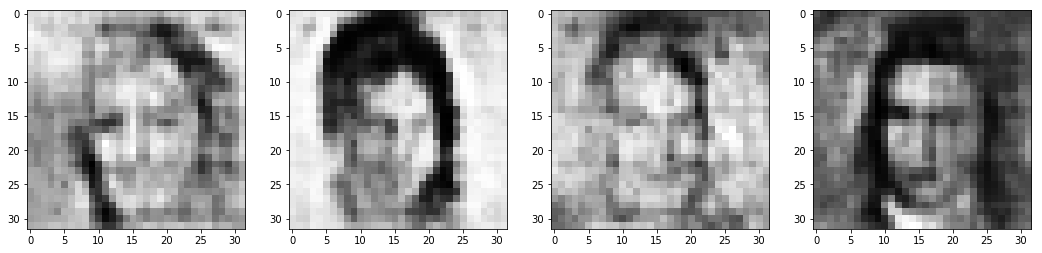

Epoch 1	Step 3500	Discriminator Loss: 0.5315357868280262	Total Loss: 1.8201346272230148


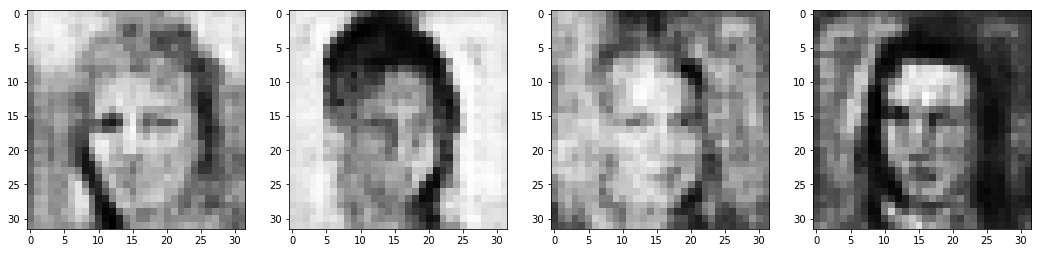

Epoch 1	Step 3600	Discriminator Loss: 0.5995618369244039	Total Loss: 1.8340619039535522


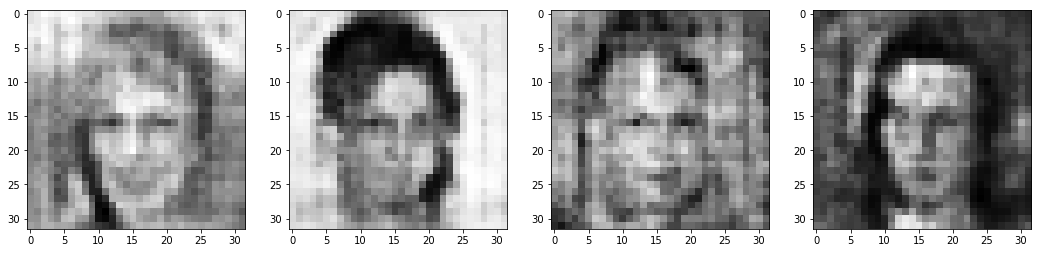

Epoch 1	Step 3700	Discriminator Loss: 0.6154517136886716	Total Loss: 1.725934442281723


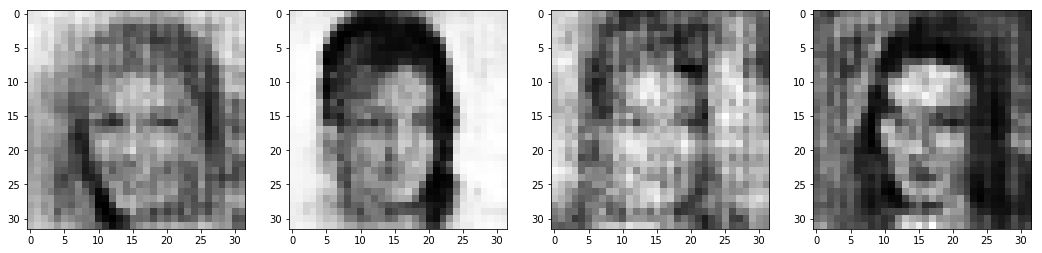

Epoch 1	Step 3800	Discriminator Loss: 0.6343228302523494	Total Loss: 1.6768337208032609


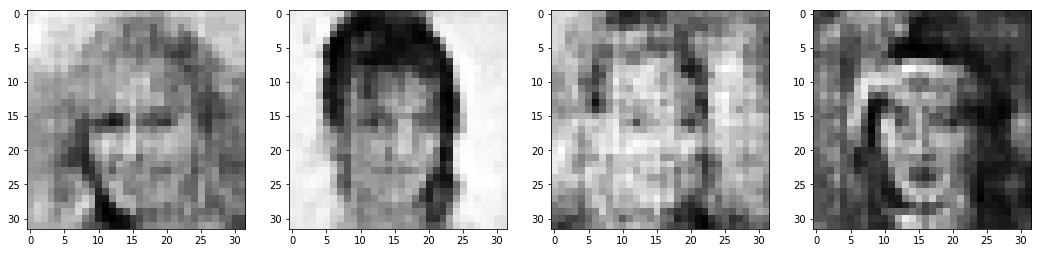

Epoch 1	Step 3900	Discriminator Loss: 0.5991115270927548	Total Loss: 1.7160417693853378


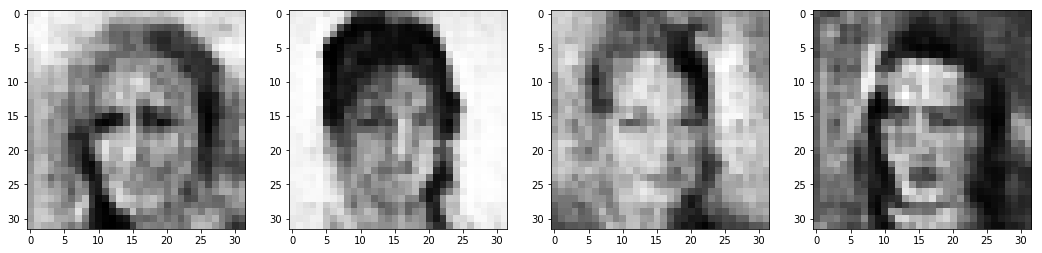

Epoch 1	Step 3960	Discriminator Loss: 0.6355601427145302	Total Loss: 1.5768082598845163


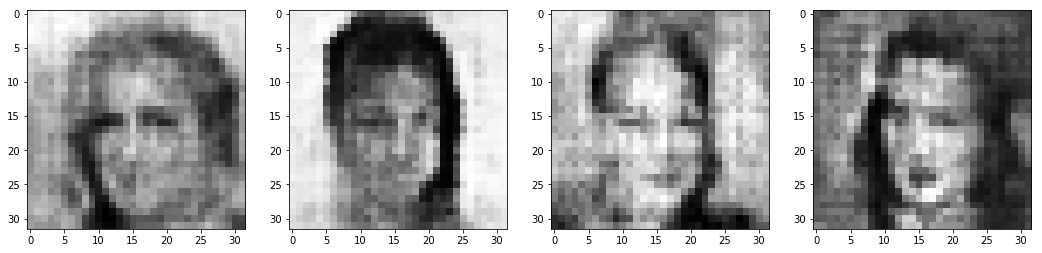

Epoch 2	Step 100	Discriminator Loss: 0.614623986966908	Total Loss: 1.602460972070694


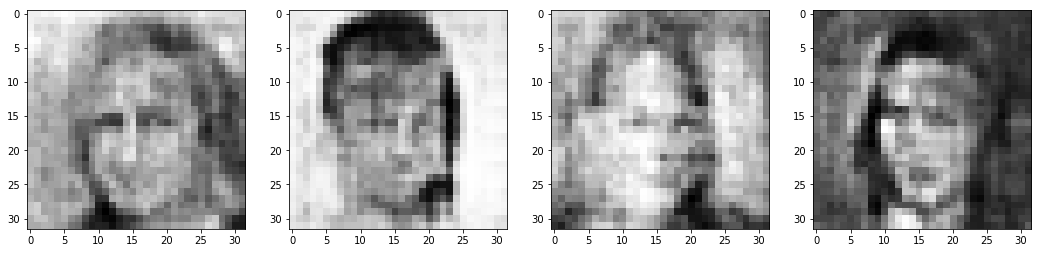

Epoch 2	Step 200	Discriminator Loss: 0.5410355270002037	Total Loss: 1.7457223919034004


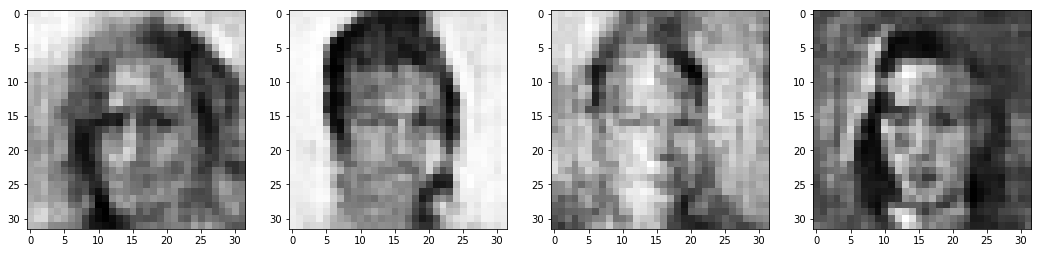

Epoch 2	Step 300	Discriminator Loss: 0.6548378013260663	Total Loss: 1.4989059817790986


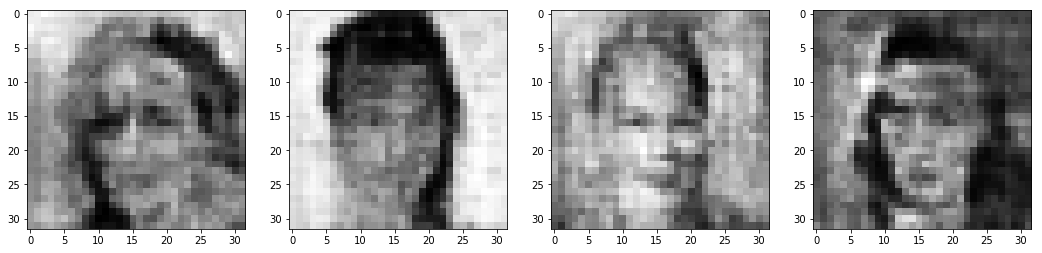

Epoch 2	Step 400	Discriminator Loss: 0.604446308980696	Total Loss: 1.2551535150408746


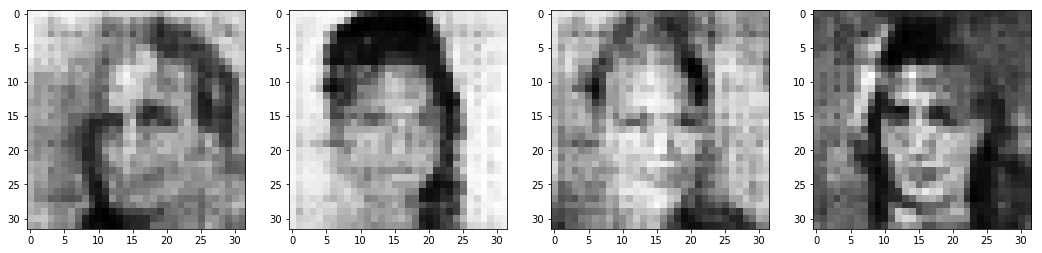

Epoch 2	Step 500	Discriminator Loss: 0.6619246625900268	Total Loss: 1.4455644971132278


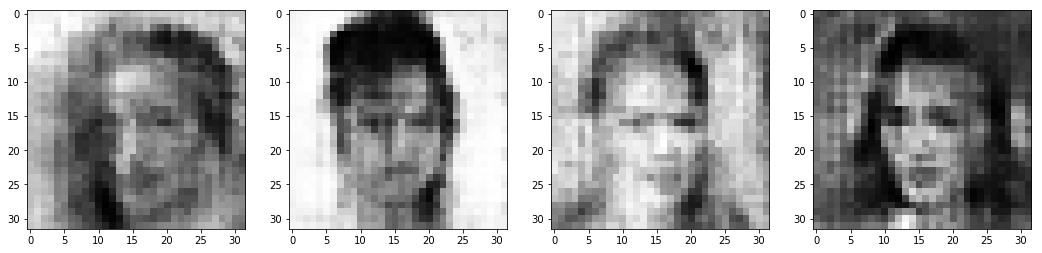

Epoch 2	Step 600	Discriminator Loss: 0.6234042949229479	Total Loss: 1.5785582703351975


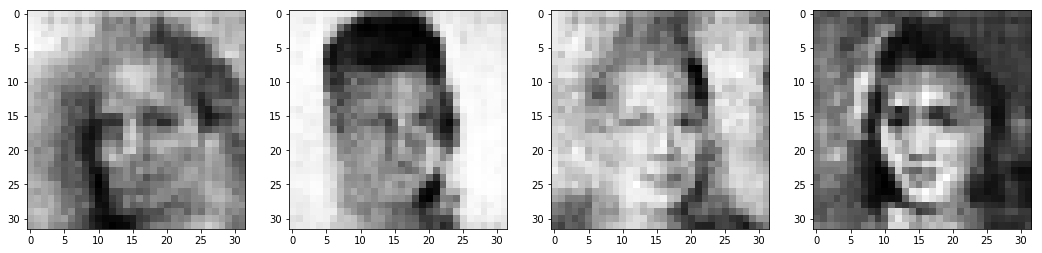

Epoch 2	Step 700	Discriminator Loss: 0.5876397537626326	Total Loss: 1.4114684861898423


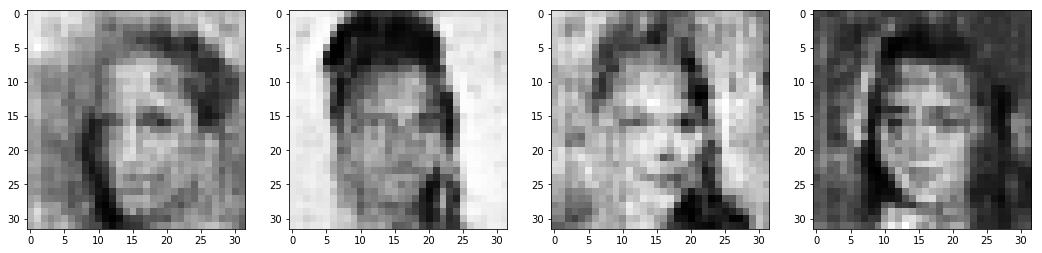

Epoch 2	Step 800	Discriminator Loss: 0.5581442601094022	Total Loss: 1.401161390542984


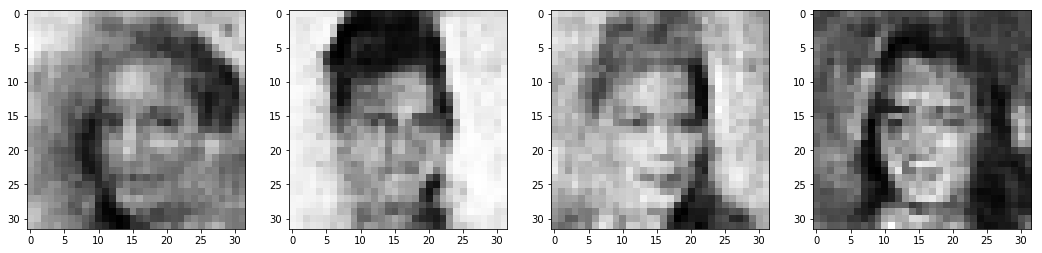

Epoch 2	Step 900	Discriminator Loss: 0.6077538556978106	Total Loss: 1.418470151424408


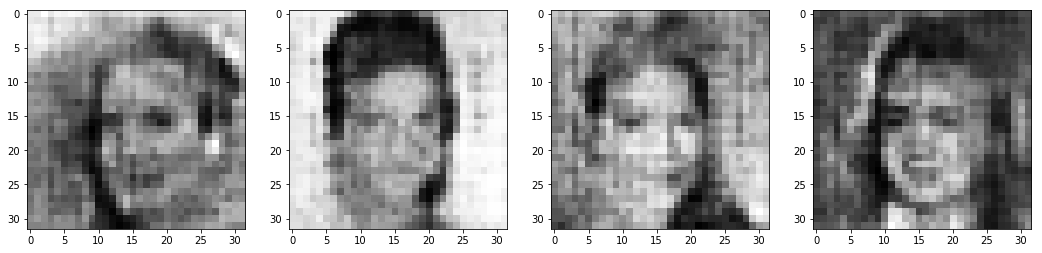

Epoch 2	Step 1000	Discriminator Loss: 0.6648177614063024	Total Loss: 1.4698610389232636


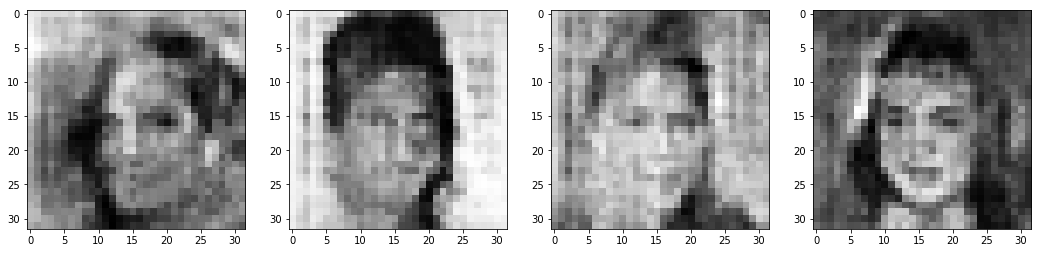

Epoch 2	Step 1100	Discriminator Loss: 0.6618481237441302	Total Loss: 1.4476527720689774


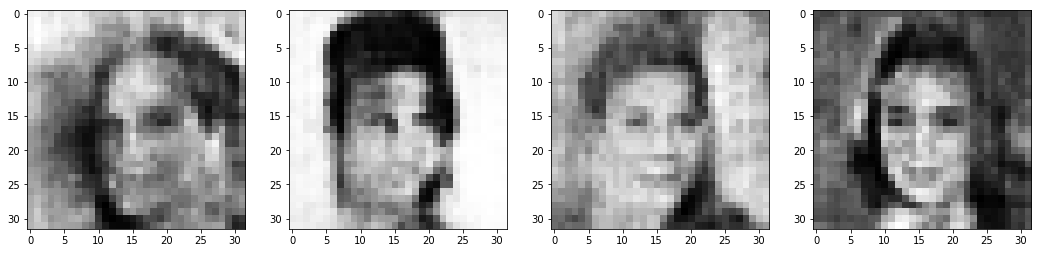

Epoch 2	Step 1200	Discriminator Loss: 0.6210121043026448	Total Loss: 1.4925946742296219


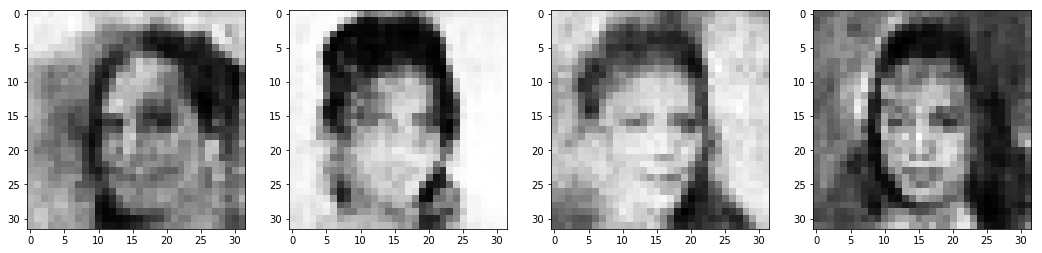

Epoch 2	Step 1300	Discriminator Loss: 0.5892751972563565	Total Loss: 1.377386141717434


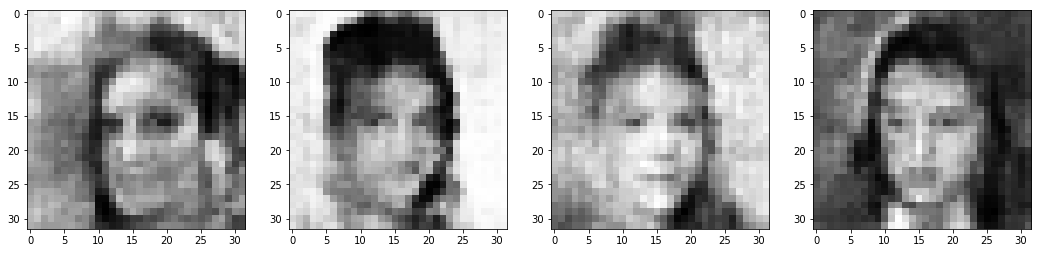

Epoch 2	Step 1400	Discriminator Loss: 0.6262014580518007	Total Loss: 1.451462136209011


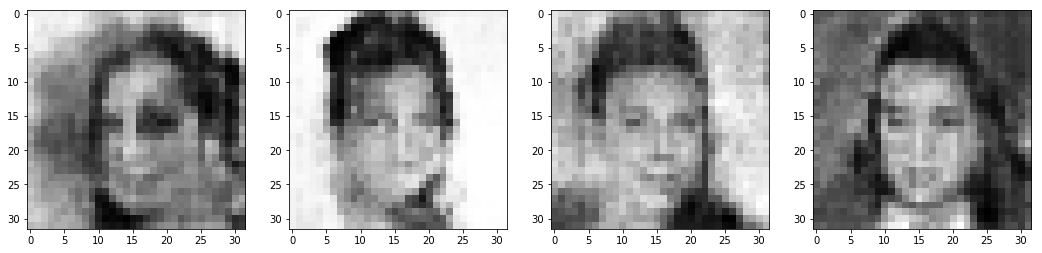

Epoch 2	Step 1500	Discriminator Loss: 0.5720893798023462	Total Loss: 1.4765719610452652


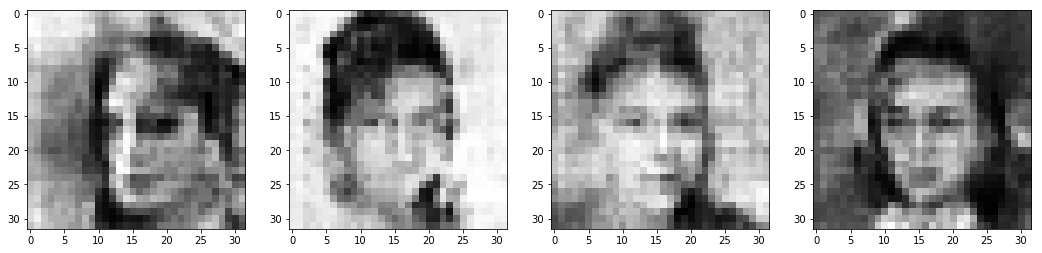

Epoch 2	Step 1600	Discriminator Loss: 0.6057096581161022	Total Loss: 1.504083832204342


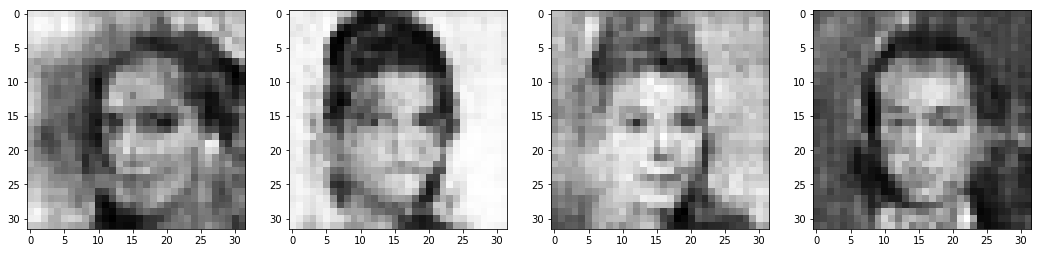

Epoch 2	Step 1700	Discriminator Loss: 0.6531818509101868	Total Loss: 1.5253889524936677


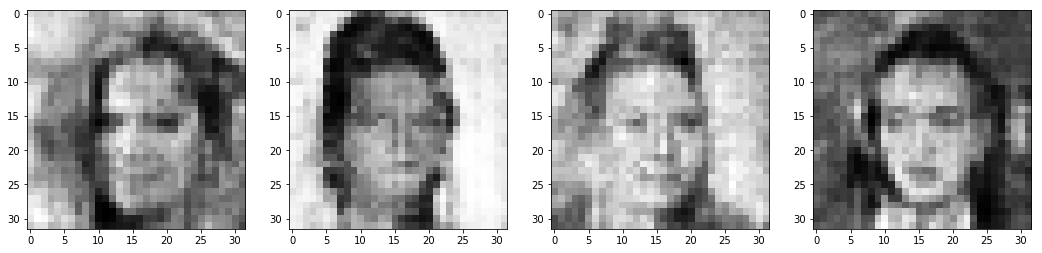

Epoch 2	Step 1800	Discriminator Loss: 0.6372062945365906	Total Loss: 1.416358044743538


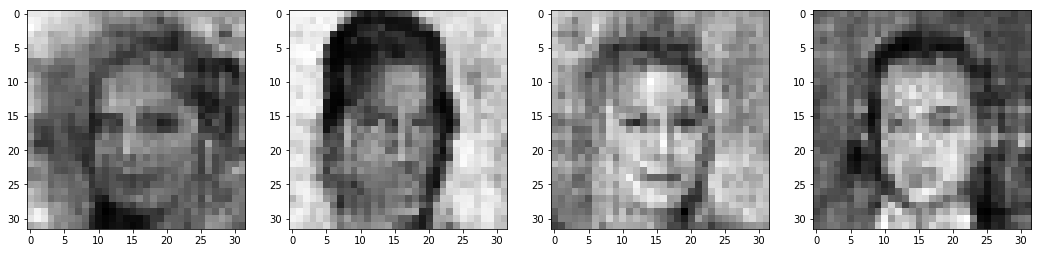

Epoch 2	Step 1900	Discriminator Loss: 0.6058033018559218	Total Loss: 1.563745157122612


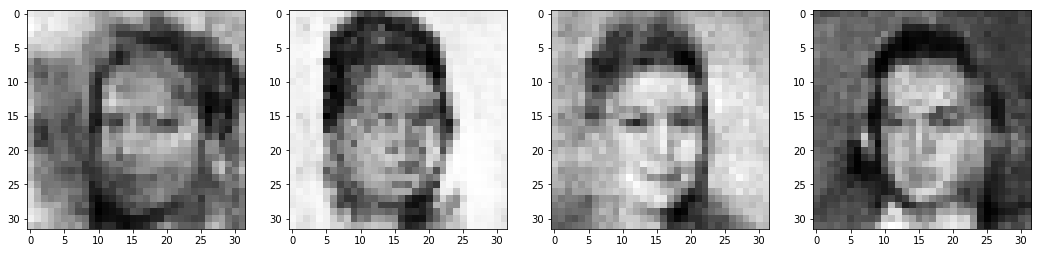

Epoch 2	Step 2000	Discriminator Loss: 0.5465943150594831	Total Loss: 1.3979463121294975


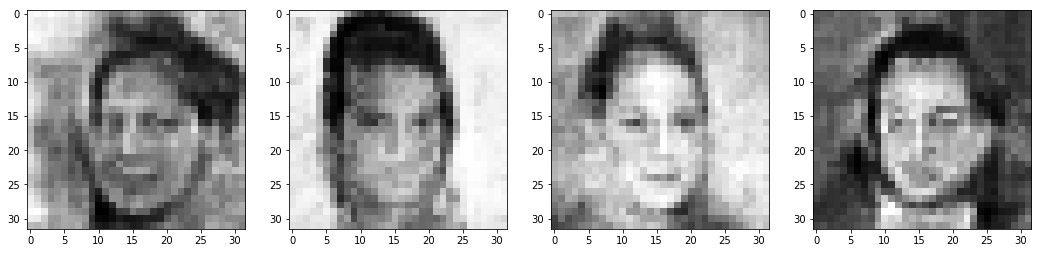

Epoch 2	Step 2100	Discriminator Loss: 0.6030886570364237	Total Loss: 1.5419712954759597


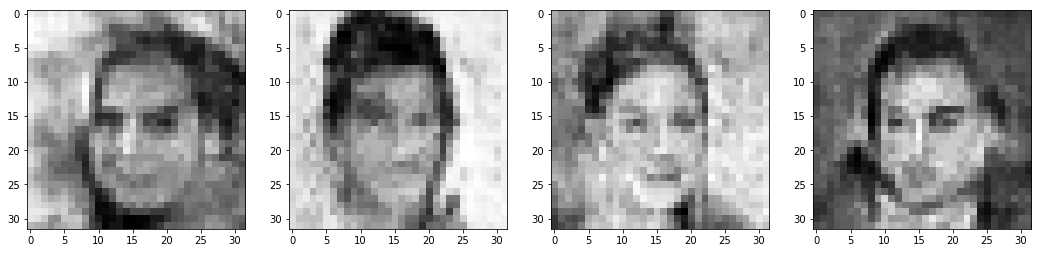

Epoch 2	Step 2200	Discriminator Loss: 0.5810571736097336	Total Loss: 1.5512044513225556


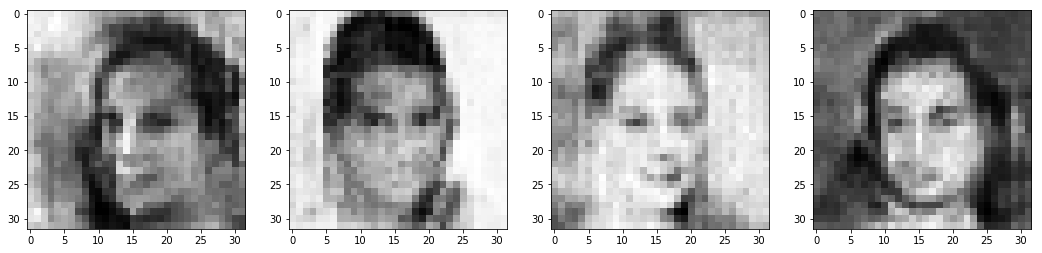

Epoch 2	Step 2300	Discriminator Loss: 0.6030100065469742	Total Loss: 1.5511085855960847


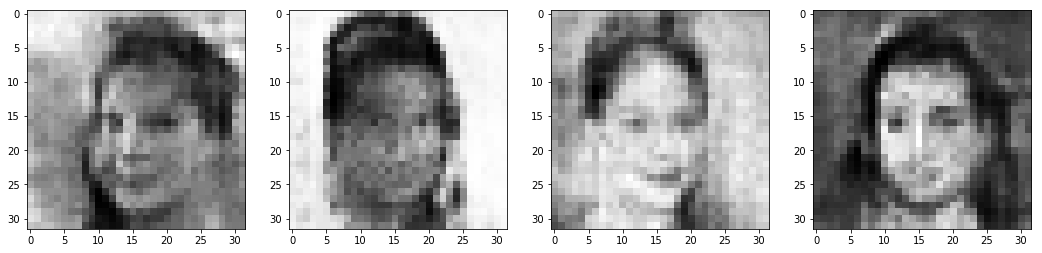

Epoch 2	Step 2400	Discriminator Loss: 0.6069144098460675	Total Loss: 1.5884847283363341


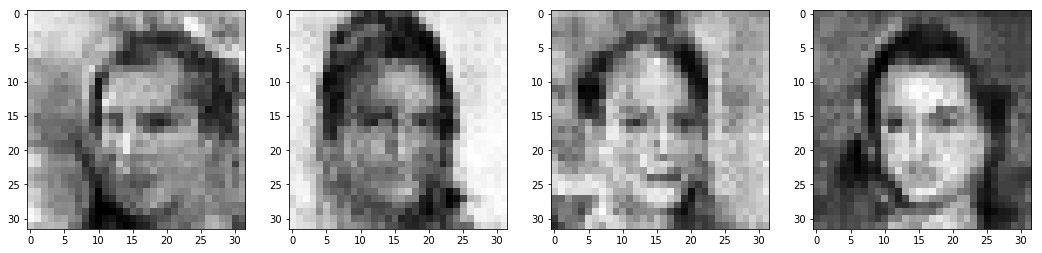

Epoch 2	Step 2500	Discriminator Loss: 0.5913772456347942	Total Loss: 1.623699536919594


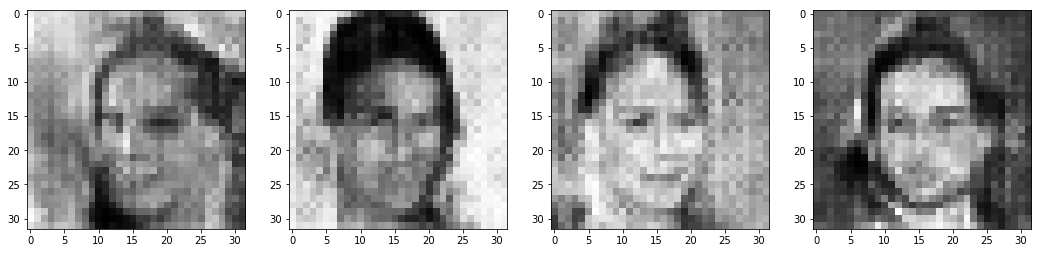

Epoch 2	Step 2600	Discriminator Loss: 0.5719060681760311	Total Loss: 1.6495193350315094


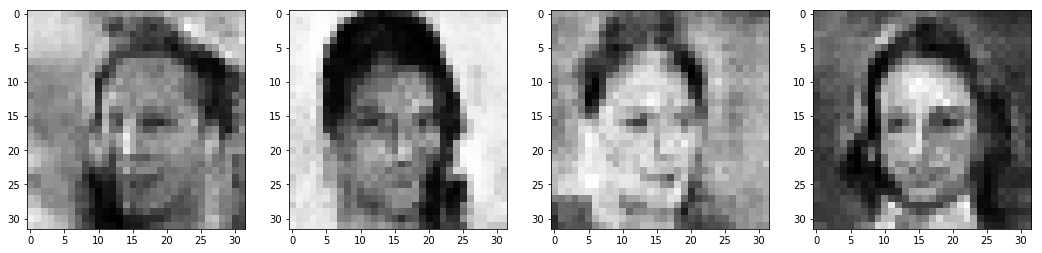

Epoch 2	Step 2700	Discriminator Loss: 0.5513665275275708	Total Loss: 1.7661130231618882


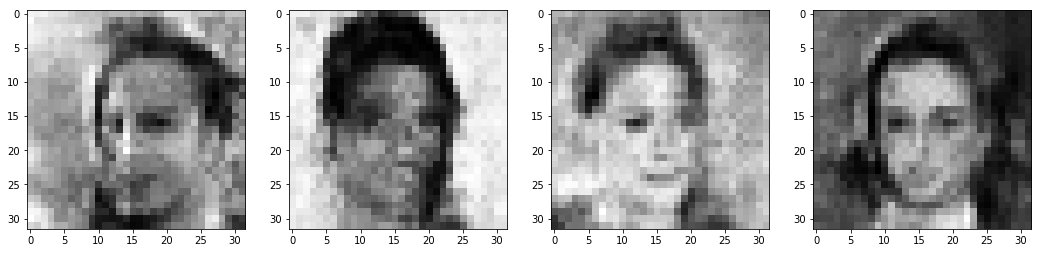

Epoch 2	Step 2800	Discriminator Loss: 0.508543358920142	Total Loss: 1.4100418639183045


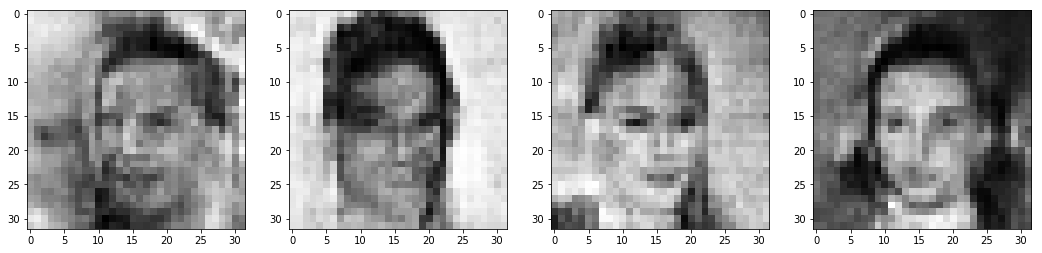

Epoch 2	Step 2900	Discriminator Loss: 0.589163588359952	Total Loss: 1.591869689822197


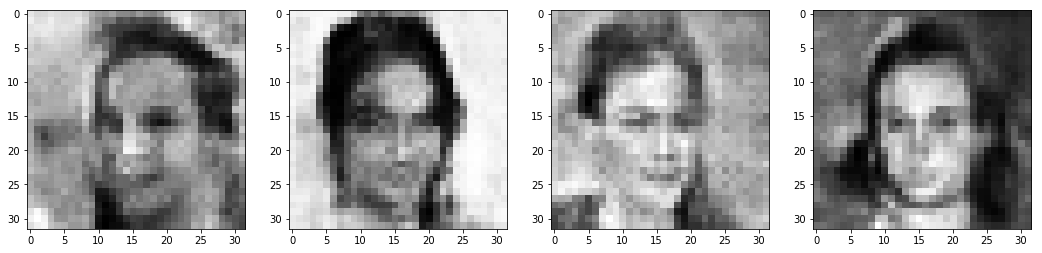

Epoch 2	Step 3000	Discriminator Loss: 0.5747266533225774	Total Loss: 1.5587352854013443


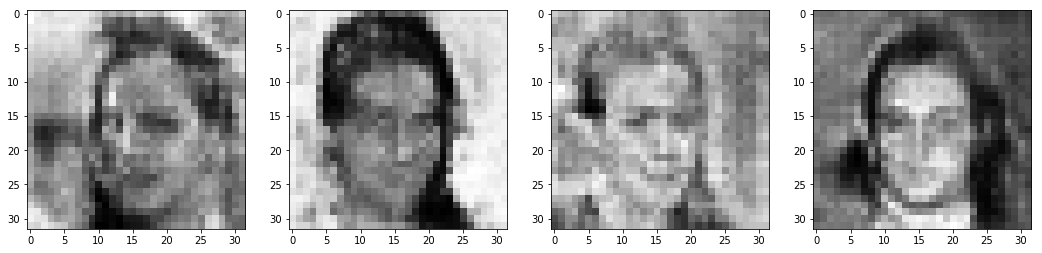

Epoch 2	Step 3100	Discriminator Loss: 0.5111006719619036	Total Loss: 1.6633039474487306


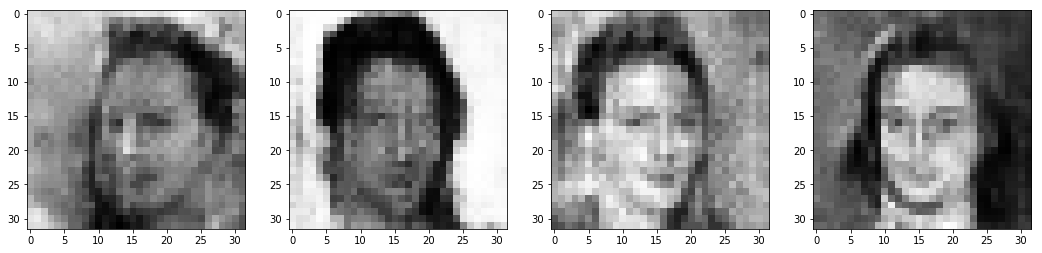

Epoch 2	Step 3200	Discriminator Loss: 0.5547453471273184	Total Loss: 1.8431756407022477


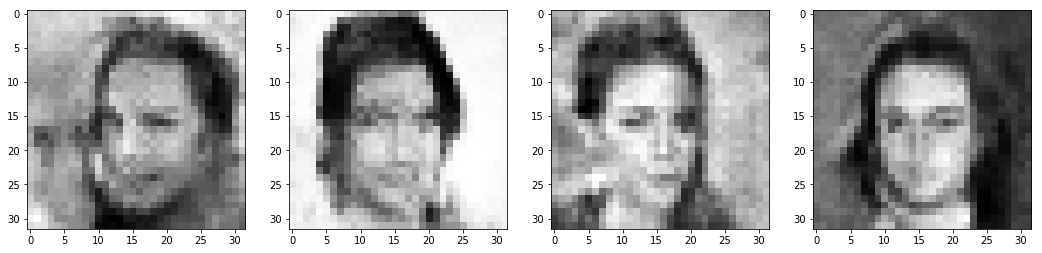

Epoch 2	Step 3300	Discriminator Loss: 0.4619285067357123	Total Loss: 1.5873364064097404


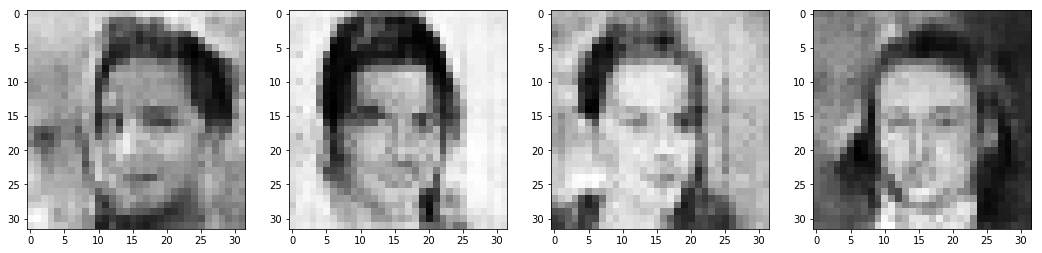

Epoch 2	Step 3400	Discriminator Loss: 0.5290113758854568	Total Loss: 1.7047960114479066


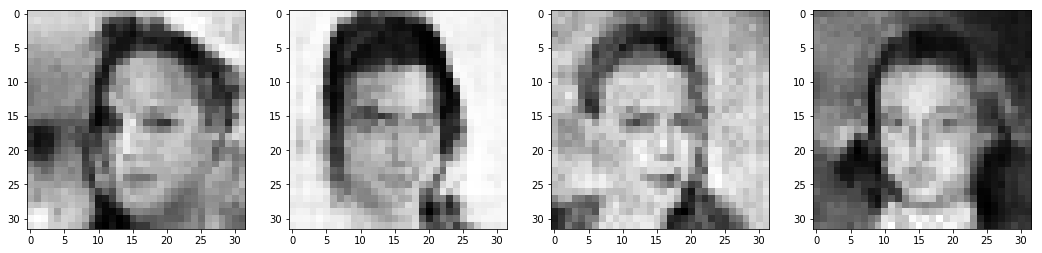

Epoch 2	Step 3500	Discriminator Loss: 0.5349921805411577	Total Loss: 1.9055001306533814


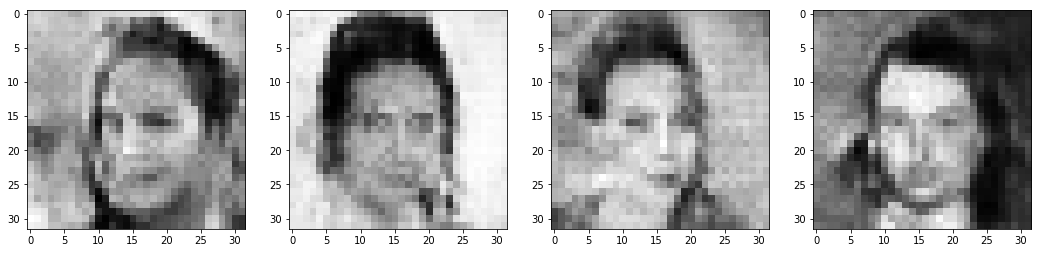

Epoch 2	Step 3600	Discriminator Loss: 0.540192144587636	Total Loss: 1.7804416555166245


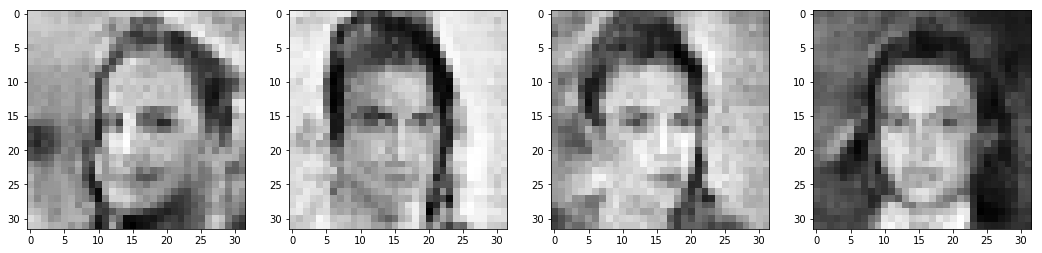

Epoch 2	Step 3700	Discriminator Loss: 0.5478941735625267	Total Loss: 1.8616432201862336


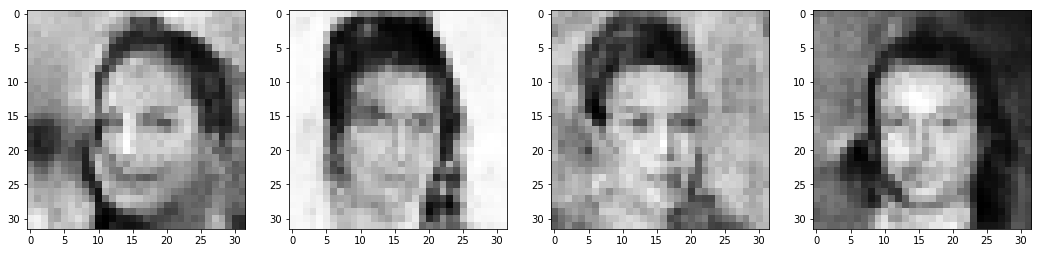

Epoch 2	Step 3800	Discriminator Loss: 0.5036004268378019	Total Loss: 1.8500872552394867


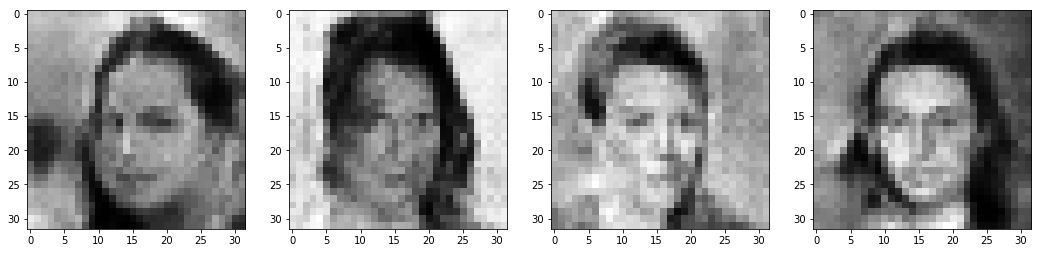

Epoch 2	Step 3900	Discriminator Loss: 0.4846110047027469	Total Loss: 1.791642951965332


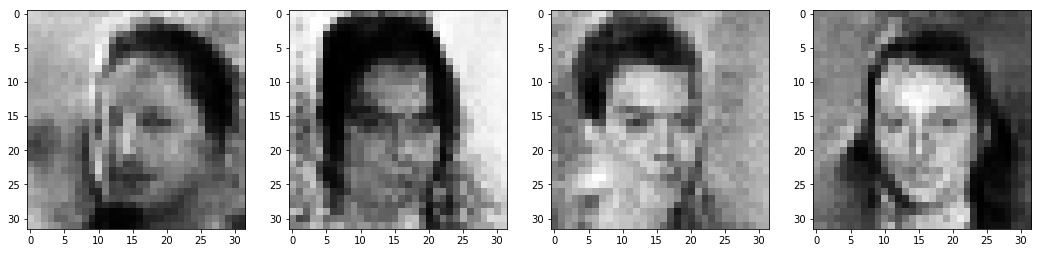

Epoch 2	Step 3960	Discriminator Loss: 0.47630431161572534	Total Loss: 1.9679958313703536


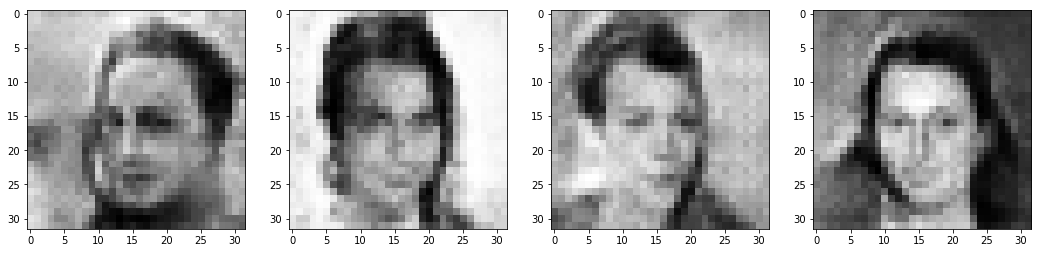

In [9]:
d_avg = 0.0
d_list = []
a_avg = 0.0
a_list = []
noise_input = np.random.normal(0.0,1.0, size=[4,100])
for i in range(epochs):
    step = 0
    laststep = 0
    for images_train in get_batches(batch_size):
        step+=1
        noise = np.random.normal(0.0, 1.0, size=[batch_size, 100])
        images_fake = G.predict(noise)
        y = np.ones([batch_size, 1])*0.9
        for layer in D.layers:
            layer.trainable = True
        d_avg += D.train_on_batch(images_train, y)
        d_avg += D.train_on_batch(images_fake, np.zeros([batch_size,1]))
        y = np.ones([batch_size, 1])
        noise = np.random.normal(0.0, 1.0, size=[batch_size, 100])
        for layer in D.layers:
            layer.trainable = False
        a_avg += AM.train_on_batch(noise, y)
        if (step)%100==0:
            d_avg/=2*(step-laststep)
            a_avg/=(step-laststep)
            d_list.append(d_avg)
            a_list.append(a_avg)
            print("Epoch {}\tStep {}\tDiscriminator Loss: {}\tTotal Loss: {}".format(i+1,step,d_avg,a_avg))
            check_output(noise_input)
            G.save_weights("../Models/CELEBA_GRAYSCALE_32_DCGAN/G_epoch_{:02d}_step_{:05d}.hdf5".format(i+1,step))
            D.save_weights("../Models/CELEBA_GRAYSCALE_32_DCGAN/D_epoch_{:02d}_step_{:05d}.hdf5".format(i+1,step))
            d_avg = 0.0
            a_avg = 0.0
            laststep = step
    d_avg/=2*(step-laststep)
    a_avg/=(step-laststep)
    print("Epoch {}\tStep {}\tDiscriminator Loss: {}\tTotal Loss: {}".format(i+1,step,d_avg,a_avg))
    check_output(noise_input)
    G.save_weights("../Models/CELEBA_GRAYSCALE_32_DCGAN/G_epoch_{:02d}_step_{:04d}.hdf5".format(i+1,step))
    D.save_weights("../Models/CELEBA_GRAYSCALE_32_DCGAN/D_epoch_{:02d}_step_{:04d}.hdf5".format(i+1,step))
    d_avg = 0.0
    a_avg = 0.0

## Check output

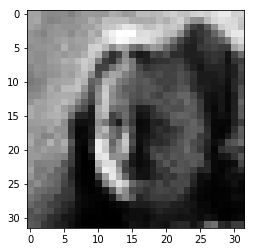

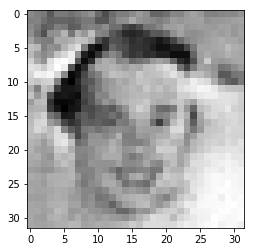

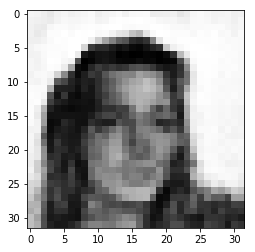

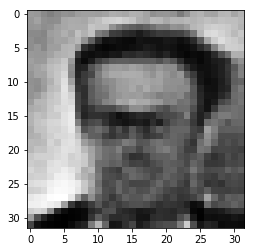

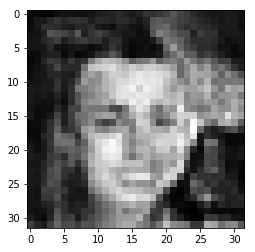

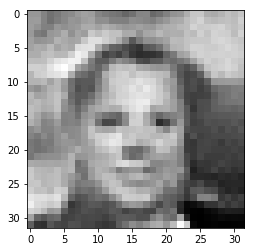

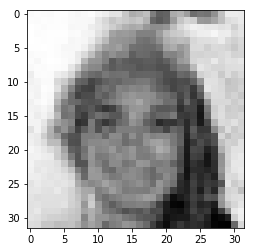

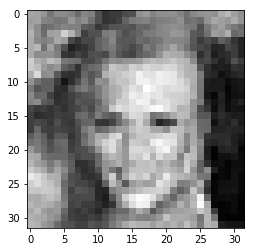

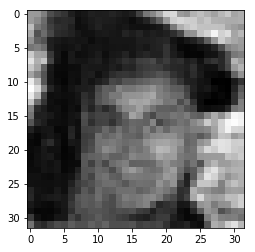

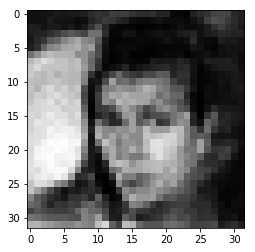

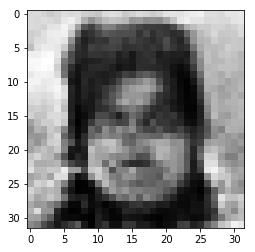

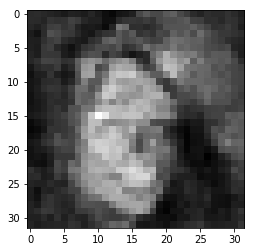

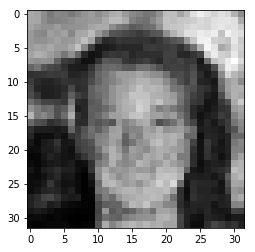

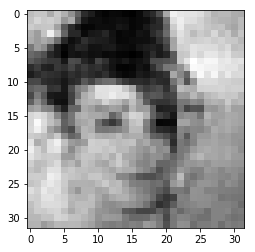

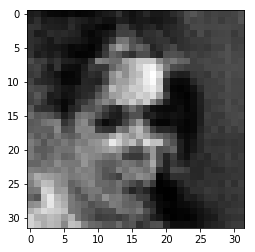

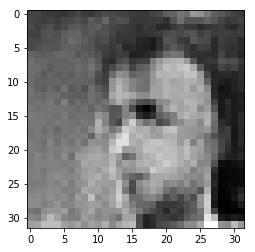

In [10]:
noise_test = np.random.normal(0.0,1.0, size=[16,100])
y_pred = G.predict(noise_test)
for i in y_pred:
    plt.imshow(i[:,:,0],cmap='gray')
    plt.show()